In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from Kinematics import Kinematics

deg2rad = np.pi / 180.0
rad2deg = 180.0 / np.pi

Q=[ 0.08777848  0.         -0.18707011]
0.0
True 0.0
1.3462973143646648
True -40.944881889763785
1.671222562137154
True -40.944881889763785
1.996147809909643
True -40.944881889763785
2.321073057682132
True -40.944881889763785
2.6459983054546212
True -40.944881889763785
2.9709235532271103
True -40.944881889763785
3.2958488009995994
True -40.944881889763785
3.620774048772089
True -40.944881889763785
3.945699296544578
True -40.944881889763785


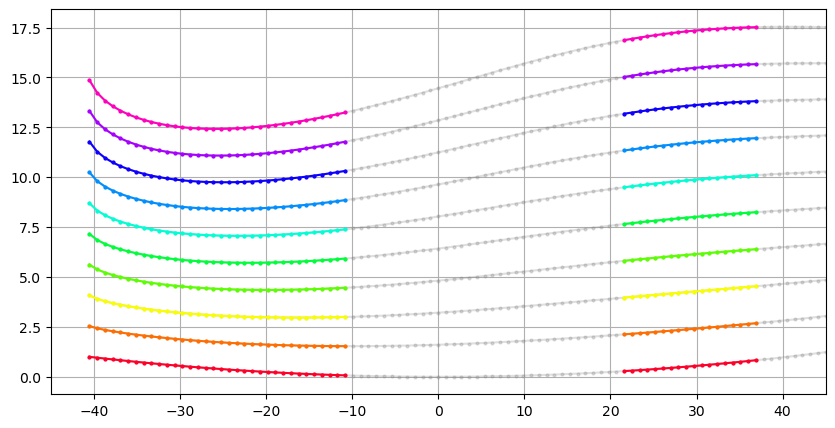

In [48]:
kin = Kinematics() 

# do FK on initial angles
angles_old = np.array([0, 40.0, 40.0, 40.0], dtype=np.float64) * deg2rad
pos_fk = np.zeros((4,3), dtype=np.float64)
kin.fk(angles_old, pos_fk)

phi_old = 0.0 * deg2rad

# get foot position from FK
Q = pos_fk[3]
Q[2] += 0.01 # move target from FK position
print(f"Q={Q}")

# target phi
phi_target = 0.0 * deg2rad

def get_loss(Q, phi_target, w_phi, w_angles):

    # compute loss for all phi values
    loss_list = []
    limits = []
    phi_range = np.linspace(-45.0, 45.0, 101) * deg2rad
    for phi in phi_range:

        angles_ik = np.zeros(4, dtype=np.float64)
        result, limit = kin.ik(Q, phi, angles_ik)

        if(result):
            loss = kin.loss(
                phi_target=phi_target, 
                phi_actual=phi, 
                phi_old=phi_old,
                angles_old=angles_old, 
                angles_new=angles_ik, 
                phi_weight=w_phi, 
                angles_weight=w_angles
            )
            loss_list.append(loss)
        else:
            loss_list.append(np.nan)
        limits.append(limit)

    return phi_range, np.array(loss_list), np.array(limits)

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()

cm = matplotlib.cm.get_cmap('gist_rainbow')

n = 10
for cval, w_angles in zip(np.linspace(0.0, 1.0, n), np.linspace(0.0, 2.0, n)):

    w_phi = 1.0
    phi_range, loss_list, limits = get_loss(Q, phi_target, w_phi, w_angles)

    A = (limits != False)
    loss_without_limits = loss_list.copy()
    loss_without_limits[A] = np.nan
    
    # ax.plot(phi_range * rad2deg, loss_list, color=cm(cval), marker="o", ms=2, alpha=0.2)
    ax.plot(phi_range * rad2deg, loss_list, color="gray", marker="o", ms=2, alpha=0.25)
    ax.plot(phi_range * rad2deg, loss_without_limits, color=cm(cval), marker="o", ms=2)

    angles_search = np.zeros(4, dtype=np.float64)
    result, best_phi = kin.search(Q, phi_target, angles_out=angles_search, angles_old=angles_old, w_phi=w_phi, w_angles=w_angles, phi_old=phi_old)
    print(result, best_phi*rad2deg)

ax.grid(True)
ax.set_xlim(phi_range[0] * rad2deg, phi_range[-1] * rad2deg)
plt.show()